<a href="https://colab.research.google.com/github/nitanilla/metodosNumericos/blob/main/151425_de_Interpolaci%C3%B3n_diferencias_finitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-41.6666666666667*x**3 + 37.5*x**2 - 10.8333333333333*x + 1.0
---
358.333333333334*x**3 - 242.5*x**2 + 37.1666666666667*x + 1.0
---
-208.333333333333*x**3 + 97.4999999999999*x**2 - 8.16666666666664*x + 1.0
---
41.6666666666666*x**3 - 27.5000000000001*x**2 + 6.83333333333336*x + 1.0
---
 valores de fi:  [1.  1.6 1.7 2. ]
divisores en L(i):  [-0.024  0.004 -0.003  0.008]

Polinomio de Lagrange, expresiones
400.0*x*(x - 0.4)*(x - 0.3) - 566.666666666667*x*(x - 0.4)*(x - 0.2) + 250.0*x*(x - 0.3)*(x - 0.2) - 41.6666666666667*(x - 0.4)*(x - 0.3)*(x - 0.2)

Polinomio de Lagrange: 
41.6666666666666*x**3 - 27.5000000000001*x**2 + 6.83333333333336*x + 1.0


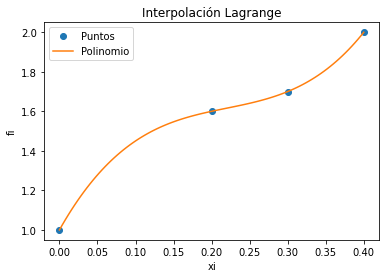

In [ ]:
# Interpolacion de Lagrange
# http://blog.espol.edu.ec/analisisnumerico/interpolacion-de-lagrange/
# divisoresL solo para mostrar valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi = np.array([0, 0.2, 0.3, 0.4])
fi = np.array([1, 1.6, 1.7, 2.0])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador
    polinomio = polinomio + terminoLi*fi[i]
    print(polinomio.expand())
    print("---")
    divisorL[i] = denominador
# simplifica el polinomio
polisimple = polinomio.expand()
# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# Salida
print(' valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

Tabla Diferencia Finita
[['i', 'xi', 'fi', 'df1', 'df2', 'df3', 'df4']]
[[ 0.    0.1   1.45  0.15 -0.05  0.25  0.  ]
 [ 1.    0.2   1.6   0.1   0.2   0.    0.  ]
 [ 2.    0.3   1.7   0.3   0.    0.    0.  ]
 [ 3.    0.4   2.    0.    0.    0.    0.  ]]
dfinita: 
[ 0.15 -0.05  0.25  0.  ]
polinomio: 
1.5*x + 41.6666666666667*(x - 0.3)*(x - 0.2)*(x - 0.1) - 2.50000000000001*(x - 0.2)*(x - 0.1) + 1.3
polinomio simplificado: 
41.6666666666667*x**3 - 27.5000000000001*x**2 + 6.83333333333335*x + 0.999999999999999


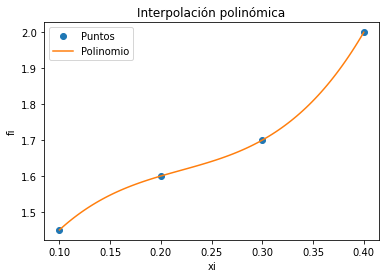

In [ ]:
# Polinomio interpolación
# Diferencias finitas avanzadas
# Tarea: Verificar tamaño de vectores,
#        verificar puntos equidistantes en x
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi = np.array([0.10, 0.2, 0.3, 0.4])
fi = np.array([1.45, 1.6, 1.7, 2.0])

# PROCEDIMIENTO

# Tabla de Diferencias Finitas
titulo = ['i','xi','fi']
n = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)
# diferencias finitas vacia
dfinita = np.zeros(shape=(n,n),dtype=float)
tabla = np.concatenate((tabla,dfinita), axis=1)
# Calcula tabla, inicia en columna 3
[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):
    # Añade título para cada columna
    titulo.append('df'+str(j-2))
    # cada fila de columna
    i = 0
    while (i < diagonal):
        tabla[i,j] = tabla[i+1,j-1]-tabla[i,j-1]
        i = i+1
    diagonal = diagonal - 1
    j = j+1

# POLINOMIO con diferencias Finitas avanzadas
# caso: puntos equidistantes en eje x
h = xi[1] - xi[0]
dfinita = tabla[0,3:]
n = len(dfinita)
# expresión del polinomio con Sympy
x = sym.Symbol('x')
polinomio = fi[0]
for j in range(1,n,1):
    denominador = np.math.factorial(j)*(h**j)
    factor = dfinita[j-1]/denominador
    termino = 1
    for k in range(0,j,1):
        termino = termino*(x-xi[k])
    polinomio = polinomio + termino*factor
# simplifica multiplicando entre (x-xi)
polisimple = polinomio.expand()

# polinomio para evaluacion numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('Tabla Diferencia Finita')
print([titulo])
print(tabla)
print('dfinita: ')
print(dfinita)
print('polinomio: ')
print(polinomio)
print('polinomio simplificado: ' )
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
##for i in range(0,n,1):
##    plt.axvline(xi[i],ls='--', color='yellow')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación polinómica')
plt.show()